# Modify runoff climatology forcing

In [2]:
# tell Python to use the ecco_v4_py in the 'ECCOv4-py' repository
from os.path import join,expanduser
import sys

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

## import required packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import s3fs
import boto3

In [3]:
# open grid file
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r5/grid/nctiles_grid/ECCO-GRID.nc')

In [4]:
# define directory to runoff file
runoff_dir = '/efs_ecco/mzahn/r5/input/input_forcing/other/'
fname = 'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin'

In [5]:
runoff = ecco.read_llc_to_tiles(runoff_dir, fname, nl=12)

load_binary_array: loading file /efs_ecco/mzahn/r5/input/input_forcing/other/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [6]:
# specify that the 5th dimension should be time
runoff_da = ecco.llc_tiles_to_xda(runoff, var_type='c',dim4='depth', dim5='time')
runoff_da

<xarray.DataArray (time: 12, k: 1, tile: 13, j: 90, i: 90)> Size: 5MB
array([[[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.26561770e-16, 3.13431572e-16, 5.19351952e-16],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           8.92115118e-18, 2.04158267e-17, 4.71840994e-17],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.22618992e-19, 1.26657027e-18, 2.35088576e-18]],

         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 5.77010378e-21, 1.19469308e-19],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [3.49937988e-13, 9.47915574e-13, 1.97739915e-12, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [6.50678716e-14, 1.75406849e-13, 4.32180198e-13, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]]],
      dtype='>f4')
Coordinates:
  * k        (k) int64 8B 0
  * time     (time) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * tile     (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i        (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89

In [7]:
# mask out land
runoff_masked = runoff_da.where(ecco_grid.hFacC)

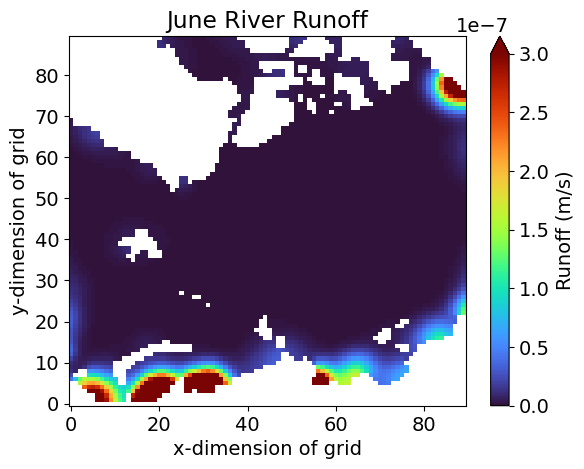

In [17]:
plt.rcParams['font.size'] = 14
runoff_masked.isel(tile=6,time=5).plot(vmin=0,vmax=3e-7,cmap='turbo',cbar_kwargs={'label': 'Runoff (m/s)'});
plt.ylabel('y-dimension of grid')
plt.xlabel('x-dimension of grid')
plt.title('June River Runoff');

## Increase runoff by 10% everywhere

In [18]:
# increase by 10%
runoff_increase_da = runoff_da + (runoff_da * 0.1)

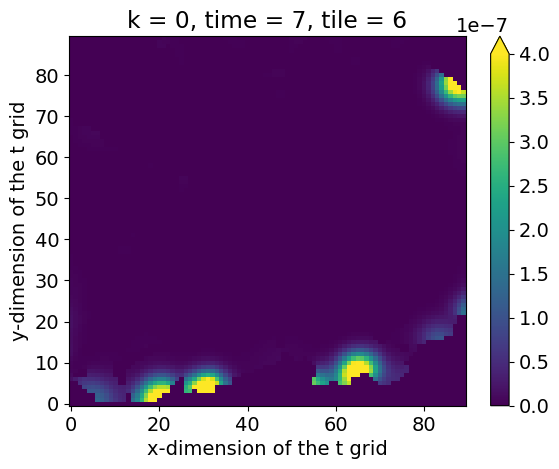

In [19]:
runoff_increase_da.isel(tile=6,time=7).plot(vmin=0,vmax=4e-7);

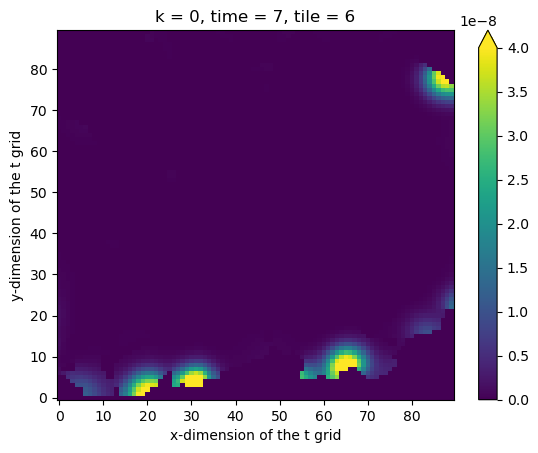

In [79]:
(runoff_increase_da - runoff_da).isel(tile=6,time=7).plot(vmin=0,vmax=4e-8);

In [44]:
# convert mask to compact, binary format
runoff_increase_compact = ecco.llc_tiles_to_compact(runoff_increase_da)

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (12, 1, 90, 90)
llc_faces_to_compact: data_compact array shape (12, 1, 1170, 90)
llc_faces_to_compact: data_compact array dtype float32


In [45]:
# export mask as binary file
runoff_increase_compact.astype('>f4').tofile('/efs_ecco/mzahn/'+'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_increase.bin')

### Open it to confirm

In [60]:
# define directory to runoff file
runoff_dir = '/efs_ecco/mzahn/'
fname = 'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_increase.bin'

In [61]:
runoff_10pct = ecco.read_llc_to_tiles(runoff_dir, fname, nl=12)

load_binary_array: loading file /efs_ecco/mzahn/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_increase.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [62]:
# specify that the 5th dimension should be time
runoff_10pct = ecco.llc_tiles_to_xda(runoff_10pct, var_type='c',dim4='depth', dim5='time')
# runoff_10pct

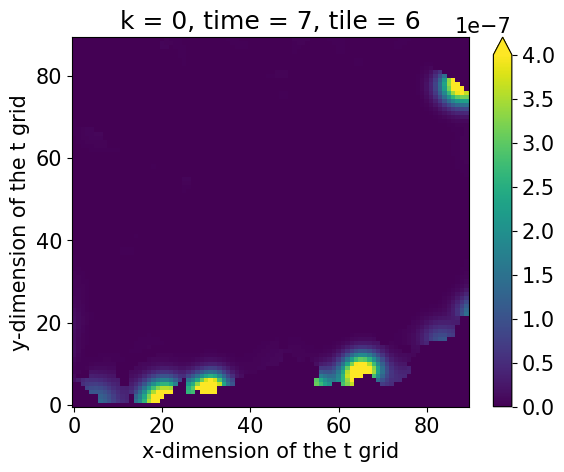

In [63]:
runoff_10pct.isel(tile=6,time=7).plot(vmin=0,vmax=4e-7);

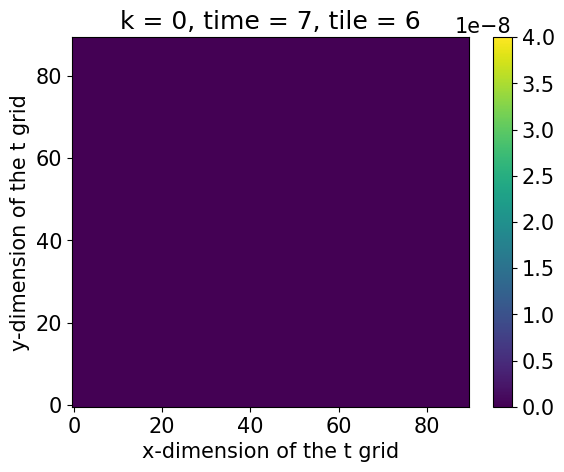

In [64]:
(runoff_10pct - runoff_increase_da).isel(tile=6,time=7).plot(vmin=0,vmax=4e-8);

## Increase runoff by 10% only in Mackenzie plume

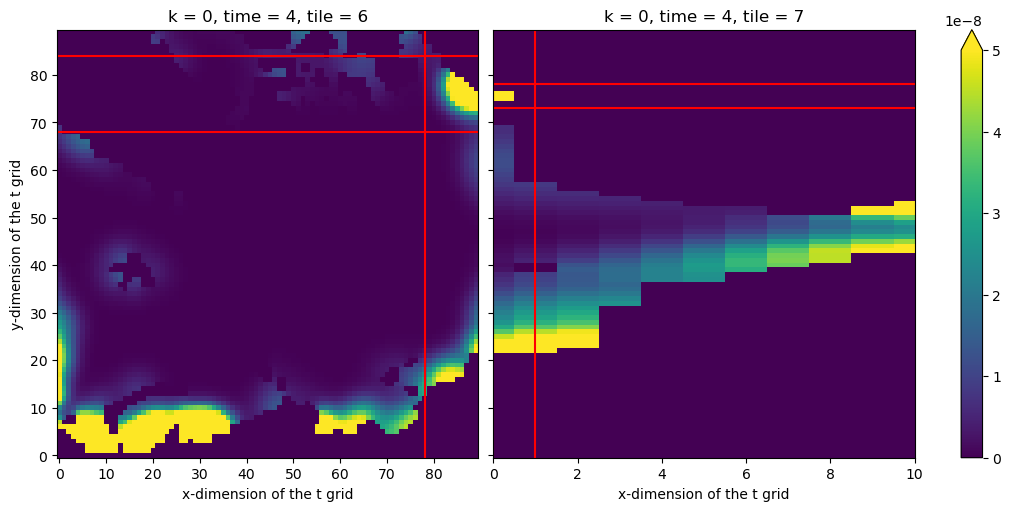

In [49]:
# plot just mackenzie region to isolate box to increase by 10%
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5],layout='constrained',sharey=True)
runoff_da.isel(tile=6,time=4).plot(ax=ax1,vmin=0,vmax=5e-8,add_colorbar=False);
runoff_da.isel(tile=7,time=4).plot(ax=ax2,vmin=0,vmax=5e-8);
ax2.set_ylabel("");

# box for tile 6
ax1.axhline(y=68,color='r')
ax1.axhline(y=84,color='r')
ax1.axvline(x=78,color='r')
ax1.axvline(x=90,color='r');

# box for tile 7
ax2.axhline(y=73,color='r')
ax2.axhline(y=78,color='r')
ax2.axvline(x=0,color='r')
ax2.axvline(x=1,color='r');

ax2.set_xlim(0,10);
# ax2.ylim(65,85);

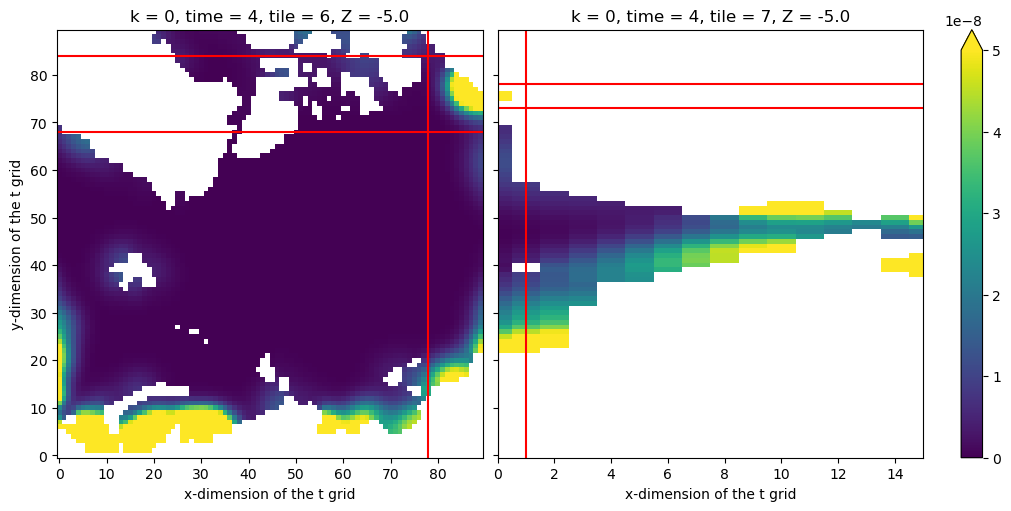

In [83]:
# plot just mackenzie region to isolate box to increase by 10%
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5],layout='constrained',sharey=True)
runoff_masked.isel(tile=6,time=4).plot(ax=ax1,vmin=0,vmax=5e-8,add_colorbar=False);
runoff_masked.isel(tile=7,time=4).plot(ax=ax2,vmin=0,vmax=5e-8);
ax2.set_ylabel("");

# box for tile 6
ax1.axhline(y=68,color='r')
ax1.axhline(y=84,color='r')
ax1.axvline(x=78,color='r')
ax1.axvline(x=90,color='r');

# box for tile 7
ax2.axhline(y=73,color='r')
ax2.axhline(y=78,color='r')
ax2.axvline(x=0,color='r')
ax2.axvline(x=1,color='r');

ax2.set_xlim(0,15);
# ax2.ylim(65,85);

Runoff


<Figure size 1400x600 with 0 Axes>

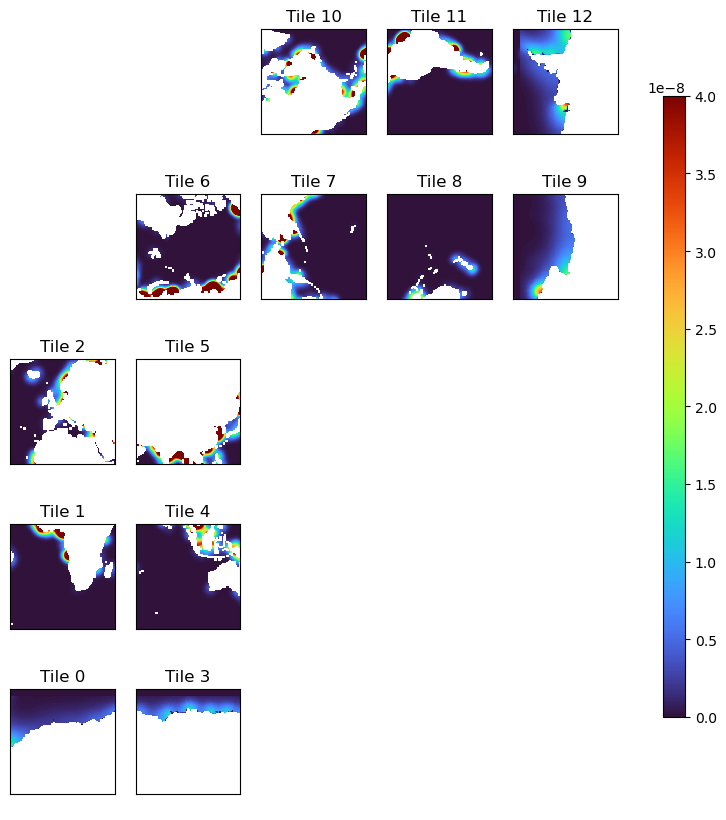

In [80]:
# Butterfly
plt.figure(figsize=[14,6]);

ecco.plot_tiles(runoff_masked.isel(k=0,time=7), show_colorbar=True, 
                cmin=0, cmax=4e-8, cmap='turbo');

print(f'Runoff');
# print(f'{str(ds.time_bnds[0][0].values)[:10]}')
# print(f'{str(ds.time_bnds[-1][-1].values)[:10]}')

Runoff


<Figure size 1400x600 with 0 Axes>

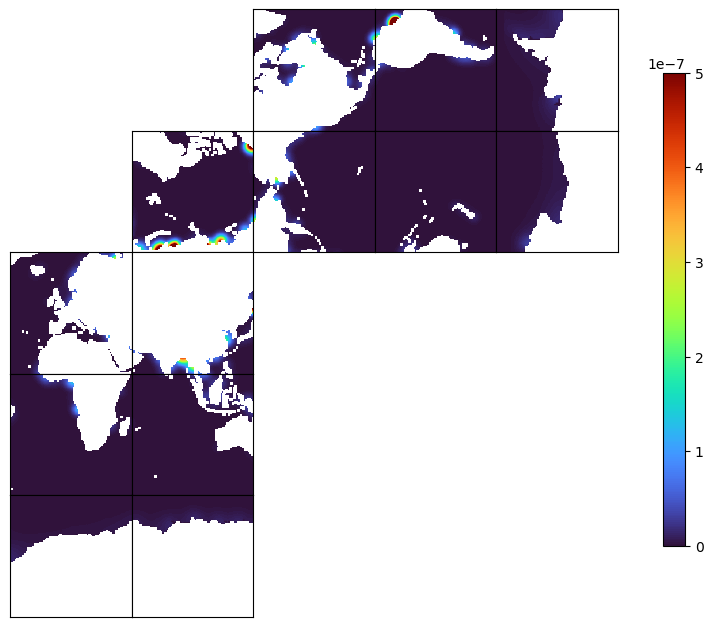

In [81]:
plt.figure(figsize=[14,6]);

ecco.plot_tiles(runoff_masked.isel(k=0,time=6), show_colorbar=True, 
                cmin=0, cmax=5e-7, 
                cmap='turbo', 
                rotate_to_latlon=True,
               show_tile_labels=False);

print(f'Runoff');

In [21]:
# increase by 10% in mackenzie river
# box for zero-indexed tile 6 (Arctic tile)

# Define the box by index ranges
i_start, i_end = 78, 90
j_start, j_end = 68, 84

# Make a copy to modify (if needed)
runoff_mack_increase_da = runoff_da.copy()

# Use isel() with slices to select the box and scale the values
runoff_mack_increase_da.loc[dict(i=slice(i_start, i_end), j=slice(j_start, j_end))] *= 1.1

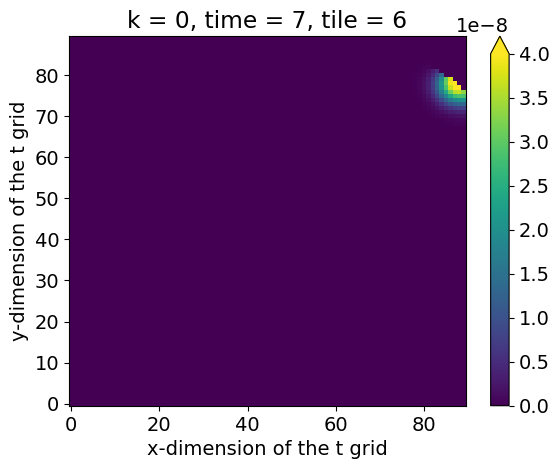

In [22]:
(runoff_mack_increase_da - runoff_da).isel(tile=6,time=7).plot(vmin=0,vmax=4e-8);

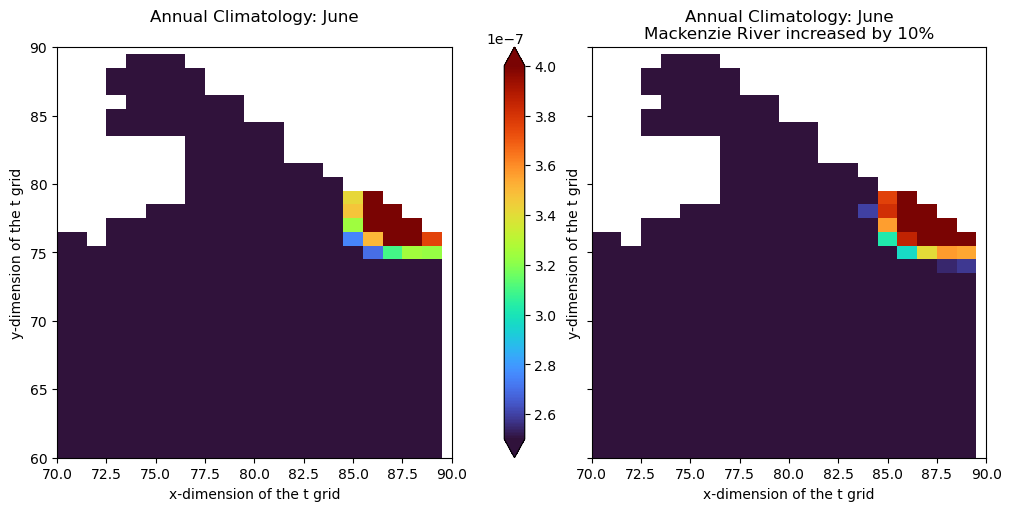

In [121]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5],sharex=True,sharey=True,layout='constrained')

runoff_da.where(ecco_grid.hFacC).isel(tile=6,time=5).plot(ax=ax1,cmap='turbo',vmin=2.5e-7,vmax=4e-7);
runoff_mack_increase_da.where(ecco_grid.hFacC).isel(tile=6,time=5).plot(ax=ax2,cmap='turbo',vmin=2.5e-7,vmax=4e-7,add_colorbar=False);

ax1.set_title('Annual Climatology: June\n')
ax2.set_title('Annual Climatology: June\nMackenzie River increased by 10%');

ax1.set_xlim(70,90);
ax2.set_ylim(60,90);

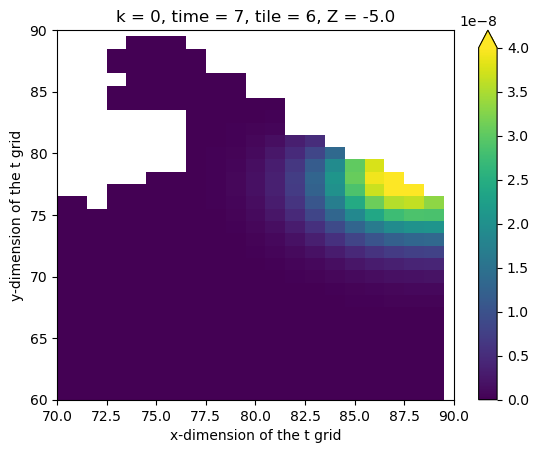

In [117]:
(runoff_mack_increase_da - runoff_da).where(ecco_grid.hFacC).isel(tile=6,time=7).plot(vmin=0,vmax=4e-8);
plt.xlim(70,90);
plt.ylim(60,90);

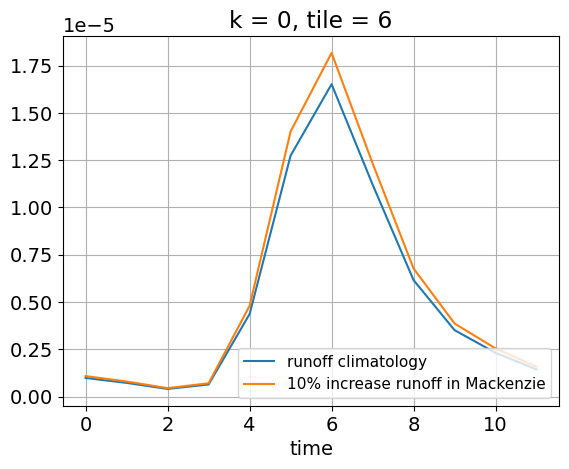

In [23]:
runoff_da.isel(tile=6, i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']).plot(label='runoff climatology');
runoff_mack_increase_da.isel(tile=6, i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']).plot(label='10% increase runoff in Mackenzie');
plt.grid()
plt.legend(loc='lower right',fontsize=11);

In [122]:
# convert mask to compact, binary format
runoff_mack_increase_compact = ecco.llc_tiles_to_compact(runoff_mack_increase_da)

llc_tiles_to_faces: num_tiles,  13
llc_faces_to_compact: face 3 shape (12, 1, 90, 90)
llc_faces_to_compact: data_compact array shape (12, 1, 1170, 90)
llc_faces_to_compact: data_compact array dtype >f4


In [123]:
# export mask as binary file
runoff_mack_increase_compact.astype('>f4').tofile('/efs_ecco/mzahn/'+'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_mack_increase.bin')

### Open it to confirm

In [130]:
# define directory to runoff file
runoff_dir = '/efs_ecco/mzahn/'
fname = 'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_mack_increase.bin'

In [131]:
runoff_10pct_mack = ecco.read_llc_to_tiles(runoff_dir, fname, nl=12)

load_binary_array: loading file /efs_ecco/mzahn/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_10pct_mack_increase.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [132]:
# specify that the 5th dimension should be time
runoff_10pct_mack = ecco.llc_tiles_to_xda(runoff_10pct_mack, var_type='c',dim4='depth', dim5='time')
# runoff_10pct

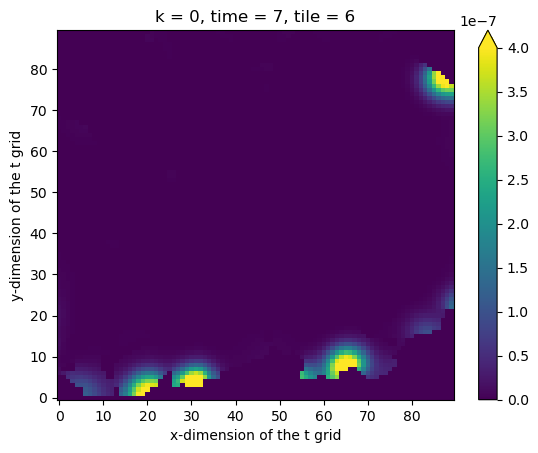

In [133]:
runoff_10pct_mack.isel(tile=6,time=7).plot(vmin=0,vmax=4e-7);

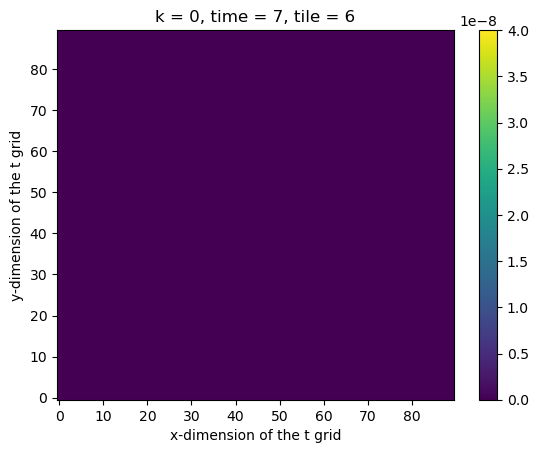

In [134]:
(runoff_10pct_mack - runoff_mack_increase_da).isel(tile=6,time=7).plot(vmin=0,vmax=4e-8);

## Plot time series for Arctic tile

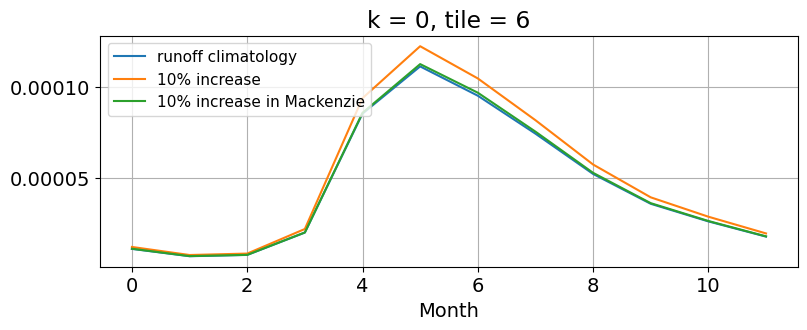

In [29]:
runoff_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='runoff climatology',figsize=[9,3]);
runoff_increase_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='10% increase');
runoff_mack_increase_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='10% increase in Mackenzie');
plt.grid()
plt.xlabel('Month')
plt.legend(loc='upper left',fontsize=11);

### Now just for the Mackenzie box

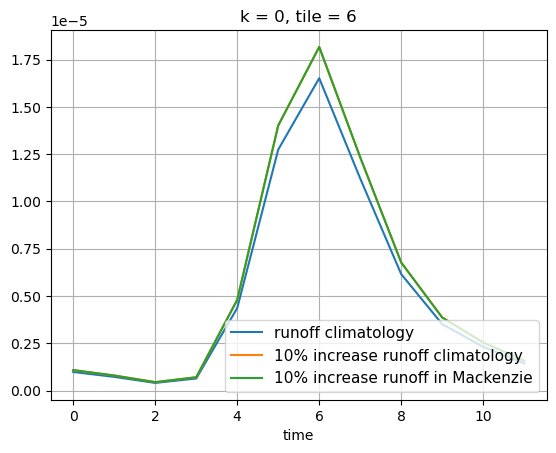

In [141]:
runoff_da.isel(tile=6,k=0,i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']).plot(label='runoff climatology');
runoff_increase_da.isel(tile=6,k=0,i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']).plot(label='10% increase runoff climatology');
runoff_mack_increase_da.isel(tile=6,k=0,i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']).plot(label='10% increase runoff in Mackenzie');
plt.grid()
plt.legend(loc='lower right',fontsize=11);

## Plot time-varying runoff

In [67]:
# define directory to runoff file
runoff_dir = '/efs_ecco/mzahn/freshwater_runoff/'
fname = 'jra55_do_runoff_ECCO_V4r5_1991'

In [78]:
runoff_daily = ecco.read_llc_to_tiles(runoff_dir, fname, nl=365)
# specify that the 5th dimension should be time
runoff_daily = ecco.llc_tiles_to_xda(runoff, var_type='c',dim4='depth', dim5='time')
# runoff_daily

load_binary_array: loading file /efs_ecco/mzahn/freshwater_runoff/jra55_do_runoff_ECCO_V4r5_1991
load_binary_array: data array shape  (365, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (365, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (365, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [80]:
import glob
import os

In [ ]:
# Directory with runoff files
runoff_dir = '/efs_ecco/mzahn/freshwater_runoff/'

# Use glob to find all files matching pattern in runoff_dir
# Adjust the pattern as needed to match your filenames, e.g., all years starting with 'jra55_do_runoff_ECCO_V4r5_'
file_pattern = os.path.join(runoff_dir, 'jra55_do_runoff_ECCO_V4r5_*')
file_list = sorted(glob.glob(file_pattern))

datasets = []

for filepath in file_list:
    # Extract the filename without extension to pass to read_llc_to_tiles
    fname = os.path.basename(filepath)
    
    # Read the runoff data using ECCO functions
    runoff = ecco.read_llc_to_tiles(runoff_dir, fname, nl=365)
    
    # Convert tiles to xarray DataArray, specify time as 5th dimension
    runoff_daily = ecco.llc_tiles_to_xda(runoff, var_type='c', dim4='depth', dim5='time')
    
    # Assign a year coordinate from filename (assuming year is in the filename, e.g., last 4 digits)
    # Adjust this parsing to fit your actual filename structure
    year_str = fname.split('_')[-1]
    try:
        year = int(year_str)
    except ValueError:
        year = None
    
    if year is not None:
        runoff_daily = runoff_daily.expand_dims({'year':[year]})
    
    datasets.append(runoff_daily)

# Concatenate all yearly datasets along the 'year' dimension
runoff_all_years = xr.concat(datasets, dim='year')

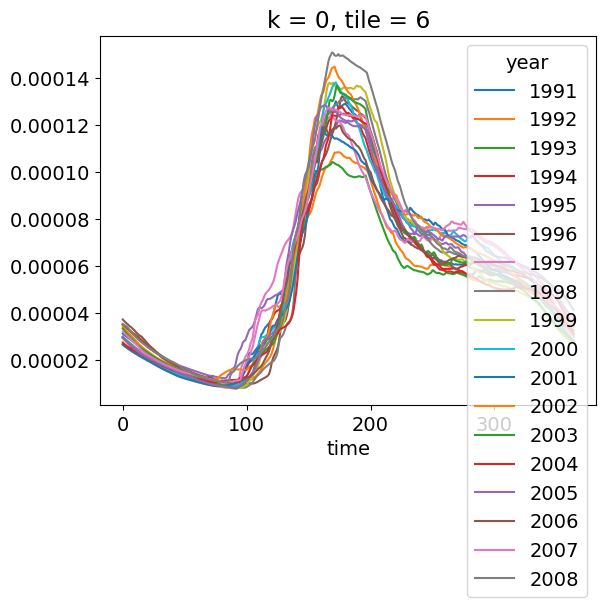

In [84]:
runoff_all_years.isel(tile=6,k=0).sum(dim=['i','j']).plot(hue='year');

In [71]:
# mask out land
runoff_daily_masked = runoff_daily.where(ecco_grid.hFacC)

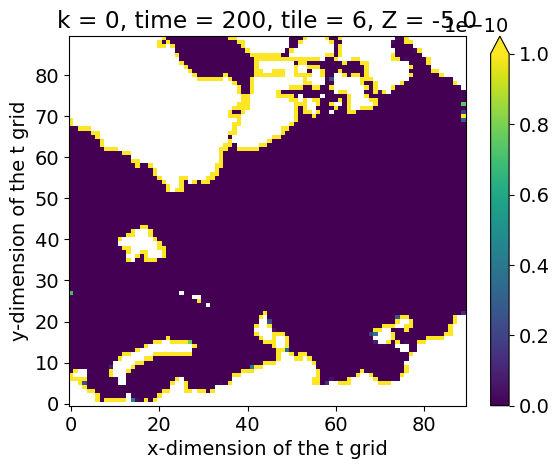

In [72]:
runoff_daily_masked.isel(tile=6,time=200).plot(vmin=0,vmax=1e-10);

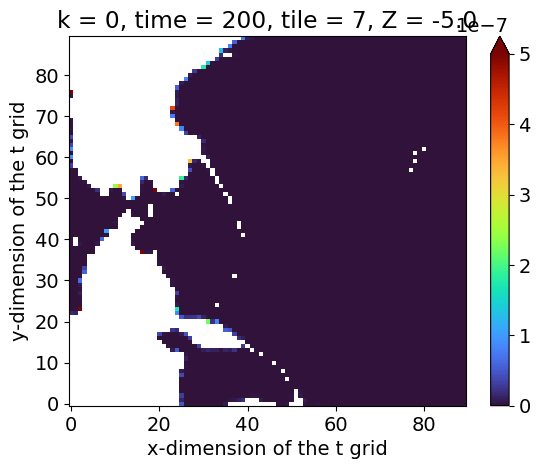

In [73]:
runoff_daily_masked.isel(tile=7,time=200).plot(vmin=0,vmax=5e-7,cmap='turbo');

Runoff


<Figure size 1400x600 with 0 Axes>

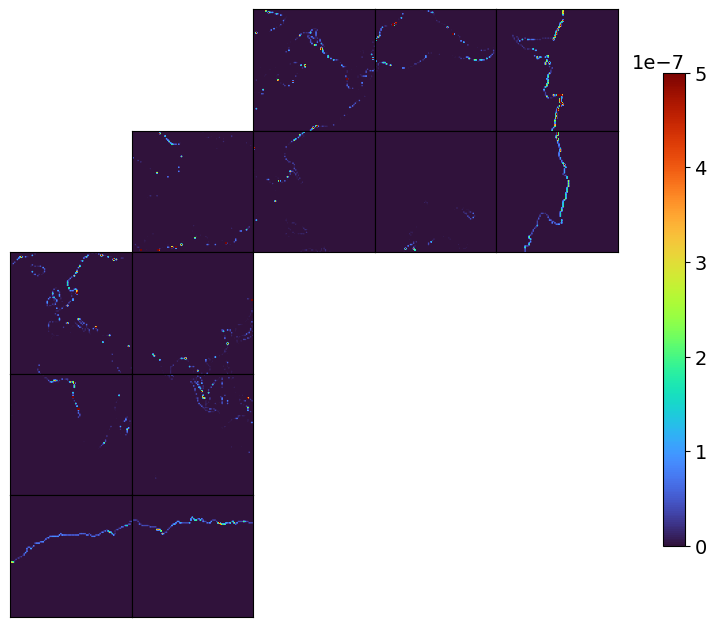

In [74]:
plt.figure(figsize=[14,6]);

ecco.plot_tiles(runoff_daily.isel(k=0,time=6), show_colorbar=True, 
                cmin=0, cmax=5e-7, 
                cmap='turbo', 
                rotate_to_latlon=True,
               show_tile_labels=False);

print(f'Runoff');

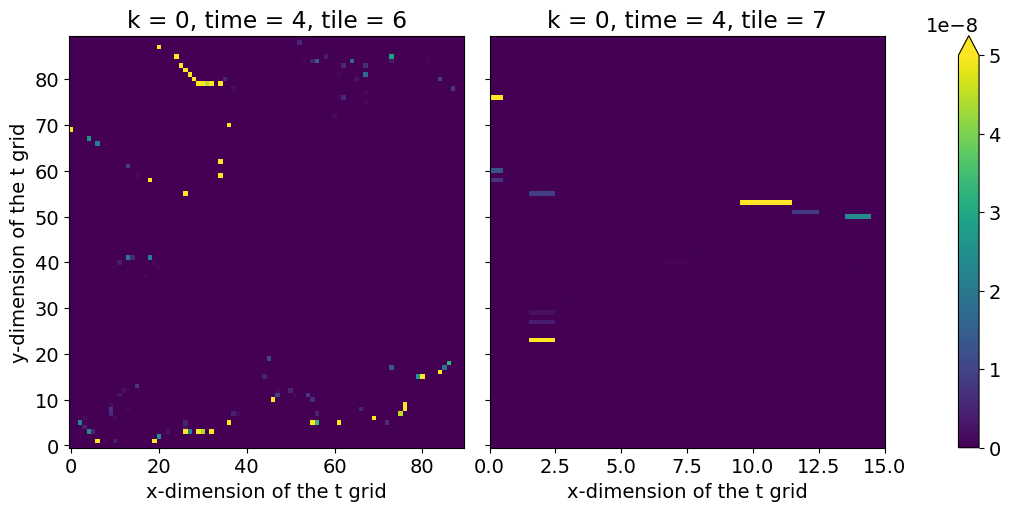

In [75]:
# plot just mackenzie region to isolate box to increase by 10%
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5],layout='constrained',sharey=True)
runoff_daily.isel(tile=6,time=4).plot(ax=ax1,vmin=0,vmax=5e-8,add_colorbar=False);
runoff_daily.isel(tile=7,time=4).plot(ax=ax2,vmin=0,vmax=5e-8);
ax2.set_ylabel("");

ax2.set_xlim(0,15);
# ax2.ylim(65,85);

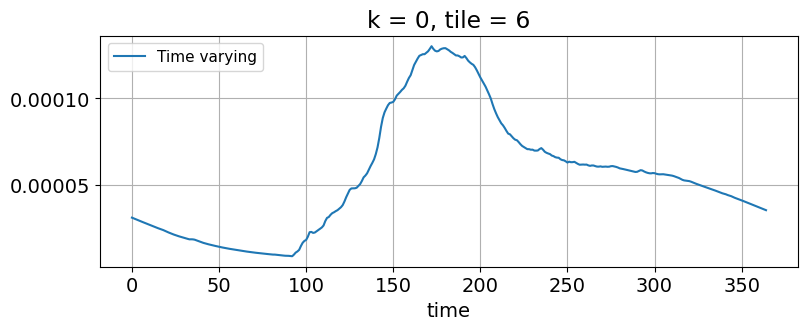

In [76]:
runoff_daily.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='Time varying',figsize=[9,3]);
plt.grid()
# plt.xlabel('Month')
plt.legend(loc='upper left',fontsize=11);

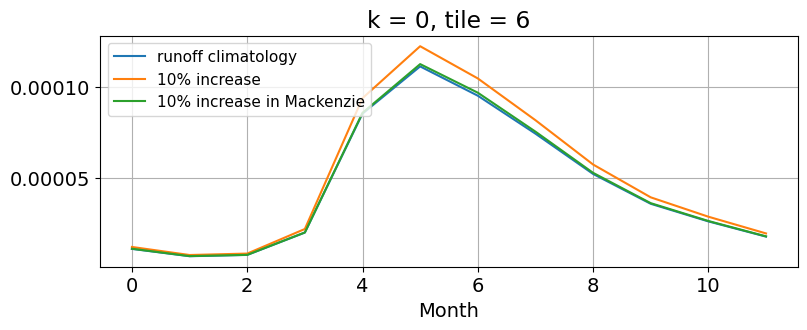

In [29]:
runoff_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='runoff climatology',figsize=[9,3]);
runoff_increase_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='10% increase');
runoff_mack_increase_da.isel(tile=6,k=0).sum(dim=['i','j']).plot(label='10% increase in Mackenzie');
plt.grid()
plt.xlabel('Month')
plt.legend(loc='upper left',fontsize=11);